Exploratory Data Analysis on Titanic Dataset

In [1]:
#First we import our library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the file
data = pd.read_csv('/Users/hazanserifli/Desktop/yazılım/Jup/EDA/Titanic/titanic.csv')

In [3]:
#Check file
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Explanations about data from Kaggle


<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


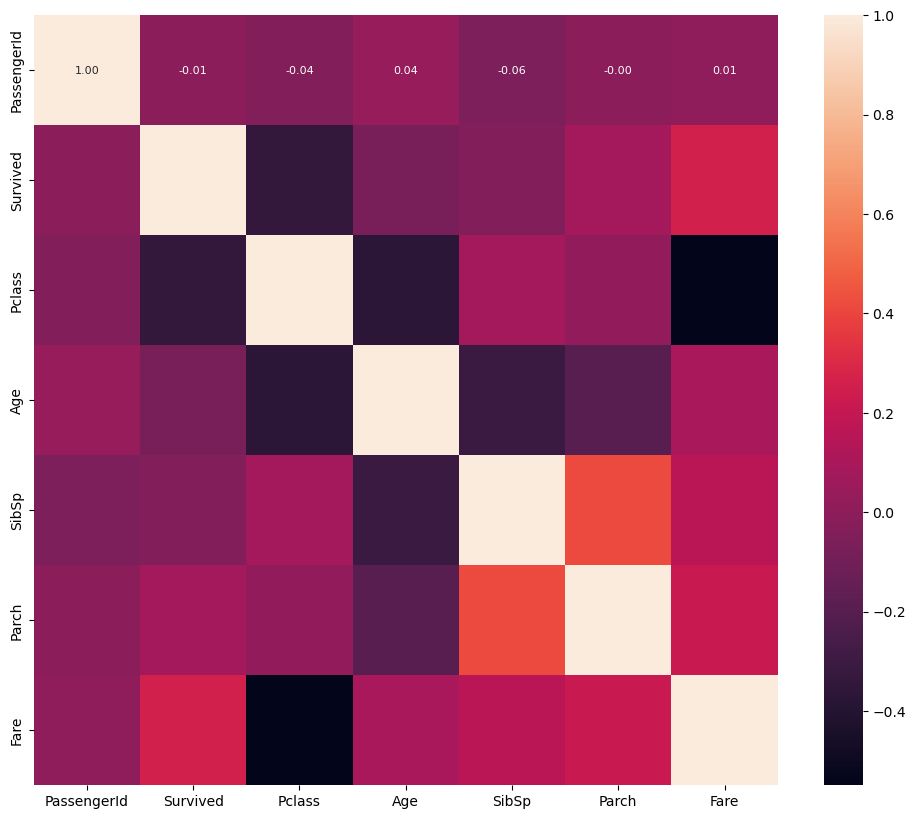

In [11]:
corr_matrix = data.corr(numeric_only=True).fillna(0)

plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 8})  # Adjust the font size as needed
plt.show()

        Sex  Ratio (%)
Sex                   
male    577  64.758698
female  314  35.241302
####################################################################


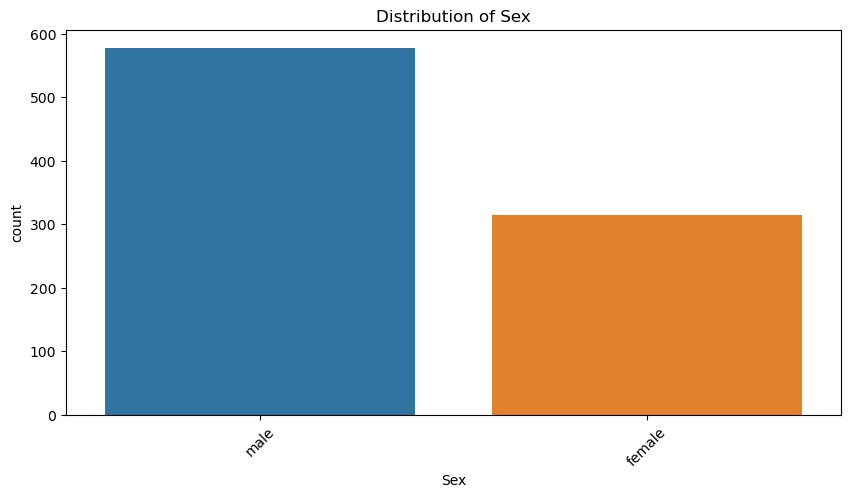

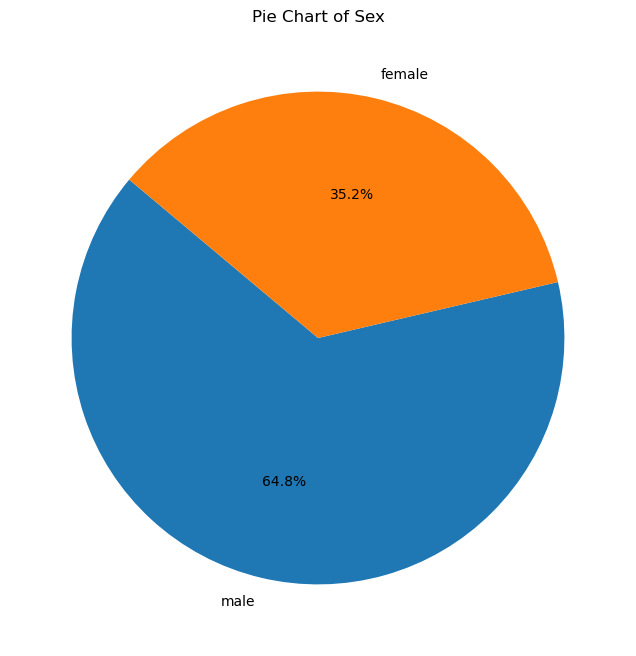

          Embarked  Ratio (%)
Embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
####################################################################


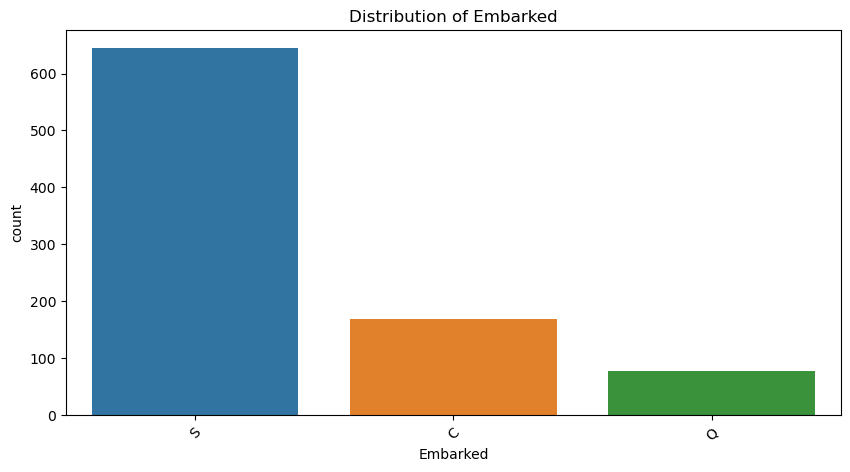

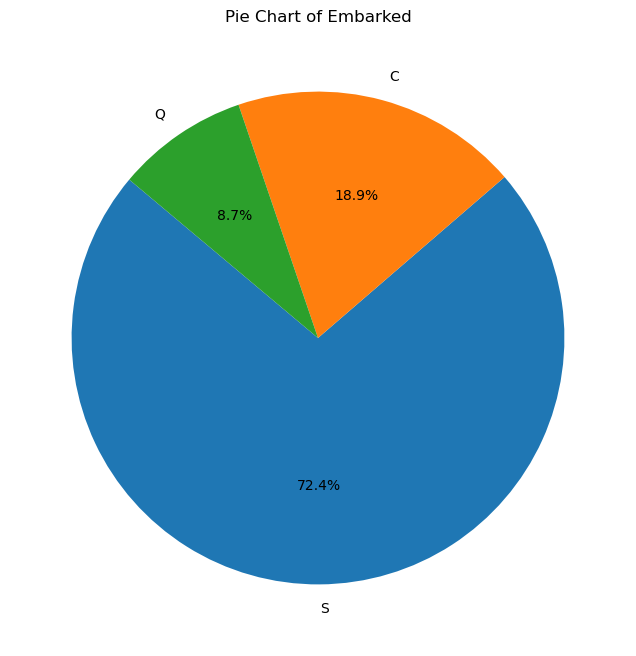

In [36]:


# Identifying Categorical Columns
cat_cols = [col for col in data.columns if str(data[col].dtypes) in ["category", "object", "bool"]]

# Identifying Numeric Columns with Few Unique Values (Potentially Categorical)
num_but_cat = [col for col in data.columns if data[col].nunique() < 10 and str(data[col].dtypes) in ["int", "float"]]

# Identifying Categorical Columns with Many Unique Values
cat_but_car = [col for col in data.columns if data[col].nunique() > 20 and str(data[col].dtypes) in ["category", "object"]]

# Combining Categorical Columns
cat_cols = cat_cols + num_but_cat

# Removing Columns with Too Many Unique Values
cat_cols = [col for col in cat_cols if col not in cat_but_car]

# Defining and Using a Summary Function
def cat_summary(dataframe, col_name, plot=False,pie=False):
    summary_df = pd.DataFrame({
        col_name: dataframe[col_name].value_counts(),
        "Ratio (%)": 100 * dataframe[col_name].value_counts() / len(dataframe)
    })
    
    print(summary_df)
    print("####################################################################")
    
    if plot:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col_name, data=dataframe, order=dataframe[col_name].value_counts().index)
        plt.title(f'Distribution of {col_name}')
        plt.xticks(rotation=45)
        plt.show()
    if pie:
        plt.figure(figsize=(8, 8))
        size = dataframe[col_name].value_counts()
        plt.pie(size, labels=size.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart of {col_name}')
        plt.show()

# Apply the summary function to each categorical column
for col in cat_cols:
    cat_summary(data, col, plot=True,pie=True)


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
95%        1.000000
99%        1.000000
max        1.000000
Name: Survived, dtype: float64
####################################################################


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


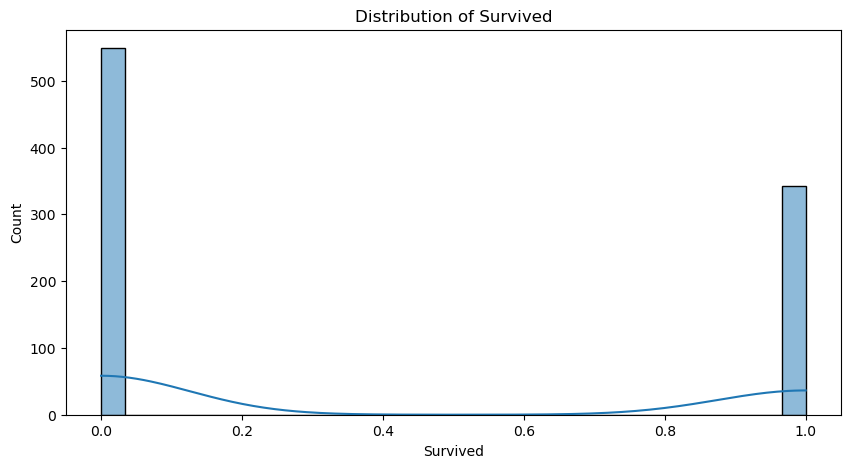

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


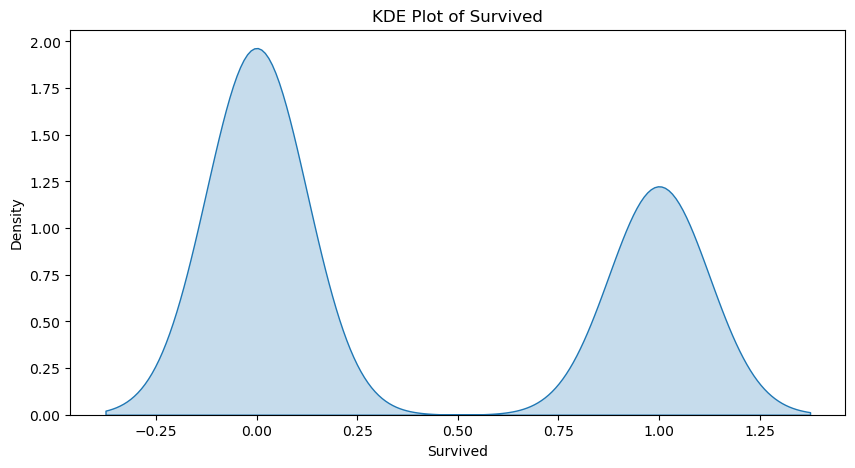

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
5%         1.000000
10%        1.000000
20%        1.000000
30%        2.000000
40%        2.000000
50%        3.000000
60%        3.000000
70%        3.000000
80%        3.000000
90%        3.000000
95%        3.000000
99%        3.000000
max        3.000000
Name: Pclass, dtype: float64
####################################################################


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


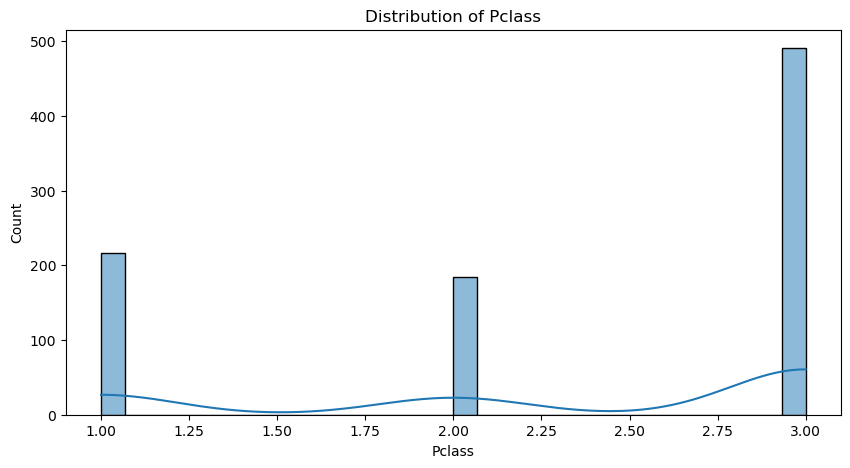

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


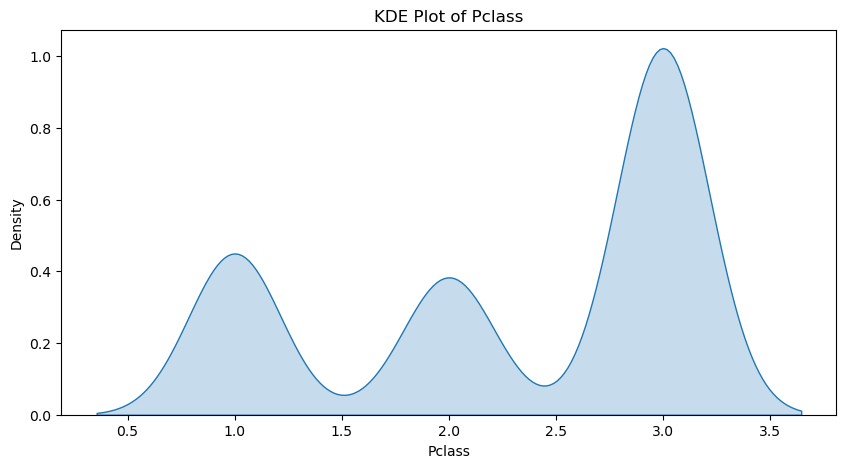

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64
####################################################################


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


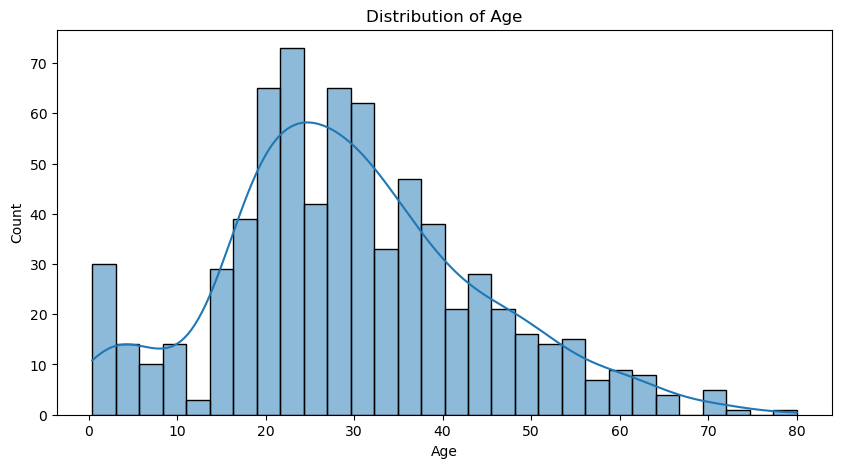

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


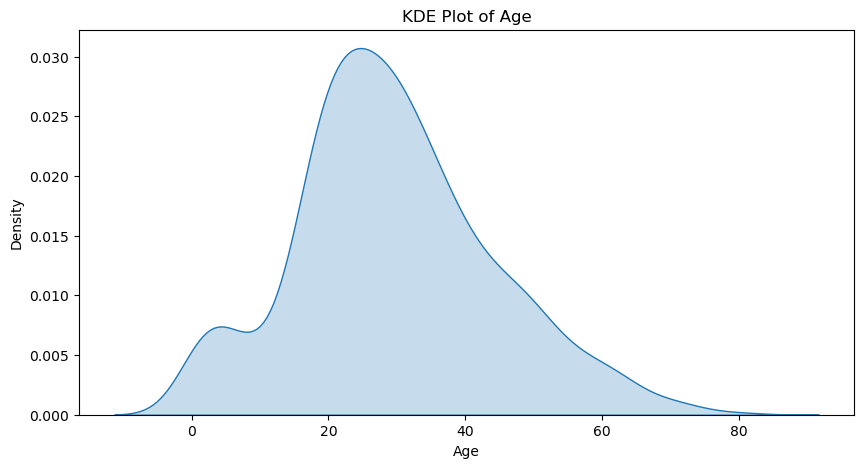

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
95%        3.000000
99%        5.000000
max        8.000000
Name: SibSp, dtype: float64
####################################################################


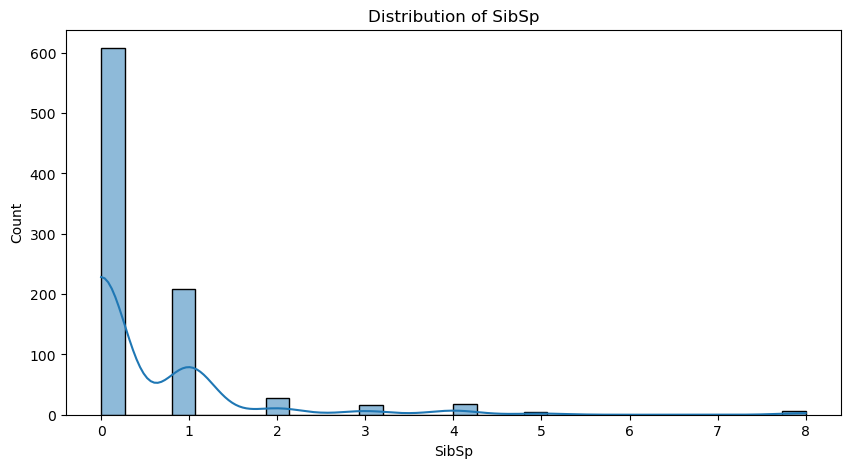

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


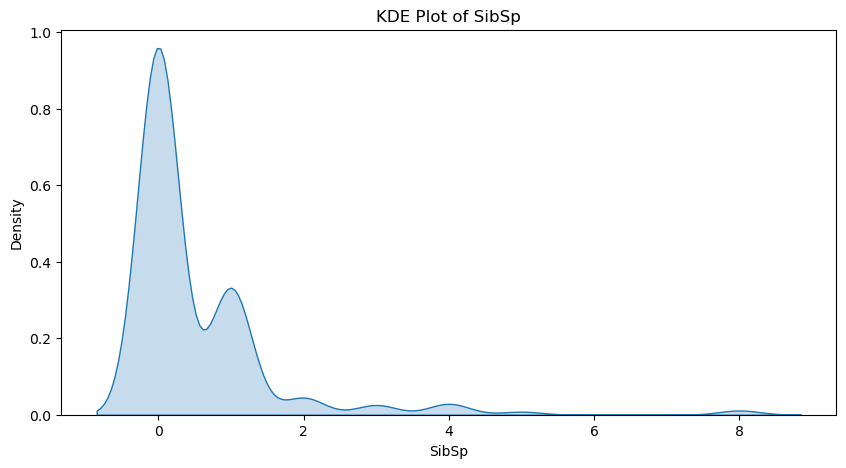

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    891.000000
mean       0.381594
std        0.806057
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        1.000000
90%        2.000000
95%        2.000000
99%        4.000000
max        6.000000
Name: Parch, dtype: float64
####################################################################


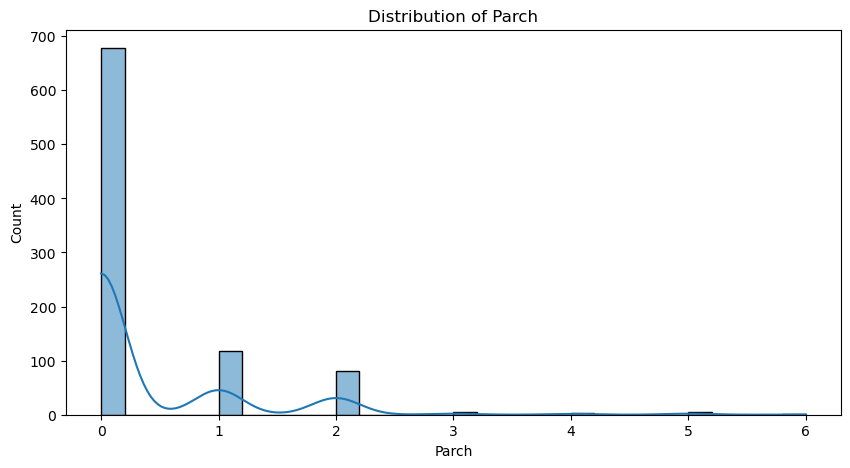

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


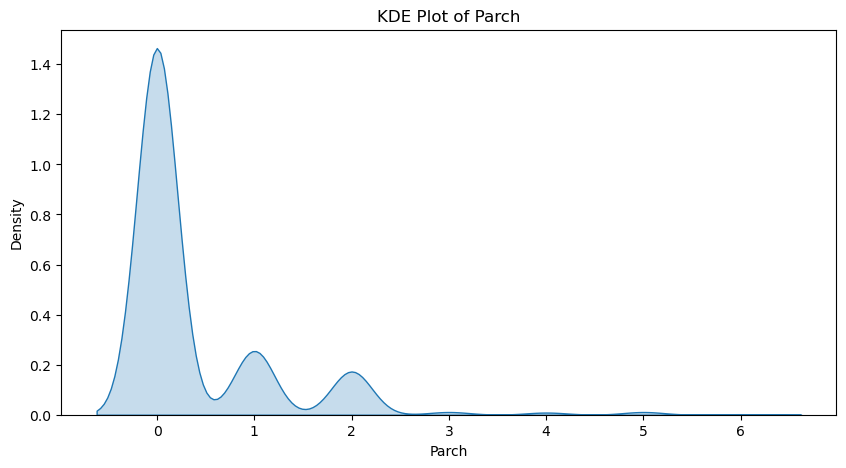

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64
####################################################################


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


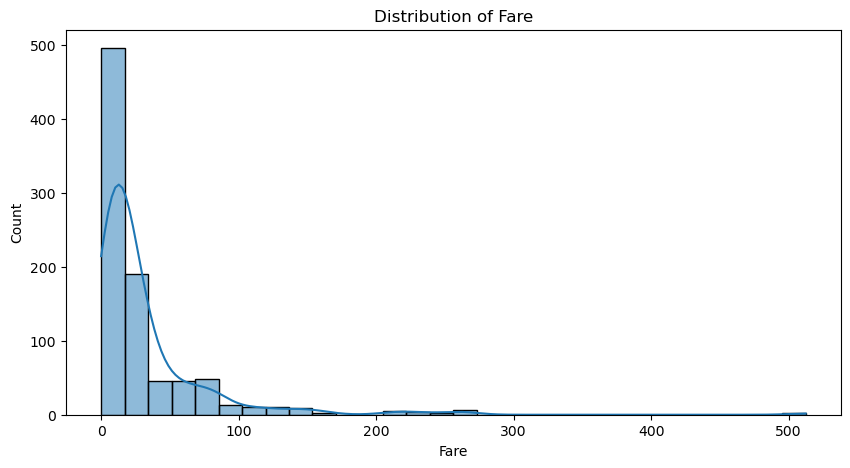

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


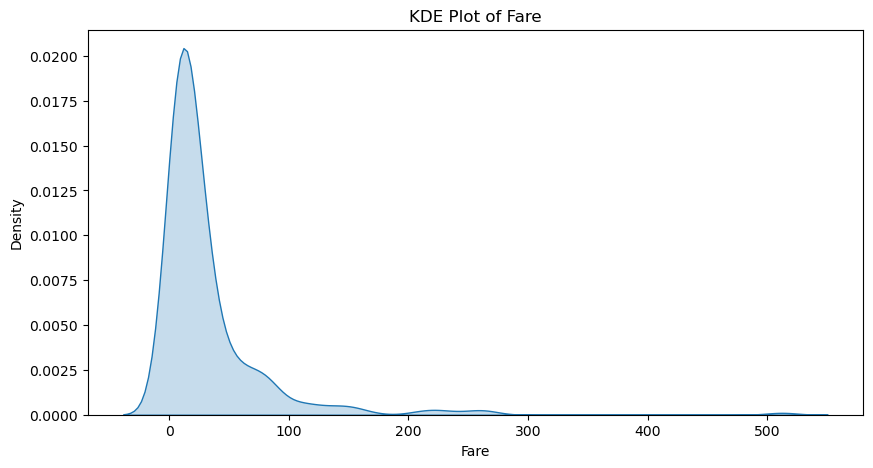

In [37]:


# Selecting numerical variables, excluding 'PassengerId'.
num_cols = [col for col in data.columns if data[col].dtypes in ["int", "float"] and col != 'PassengerId']

# Removing categorical-looking numerics from the list of numericals.
num_cols = [col for col in num_cols if col not in cat_cols]

# Defining the summary function for numerical variables.
def num_summary(dataframe, numerical_col, plot=False,kde=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    summary_df = dataframe[numerical_col].describe(quantiles).T
    print(summary_df)
    print("####################################################################")
    
    if plot:
        plt.figure(figsize=(10, 5))
        sns.histplot(dataframe[numerical_col], bins=30, kde=True)
        plt.title(f'Distribution of {numerical_col}')
        plt.show()
    if kde:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(dataframe[numerical_col], fill=True)
        plt.title(f'KDE Plot of {numerical_col}')
        plt.show()
        
# Applying the function to each numerical column.
for col in num_cols:
    num_summary(data, col, plot=True,kde=True)